Training Set:


c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


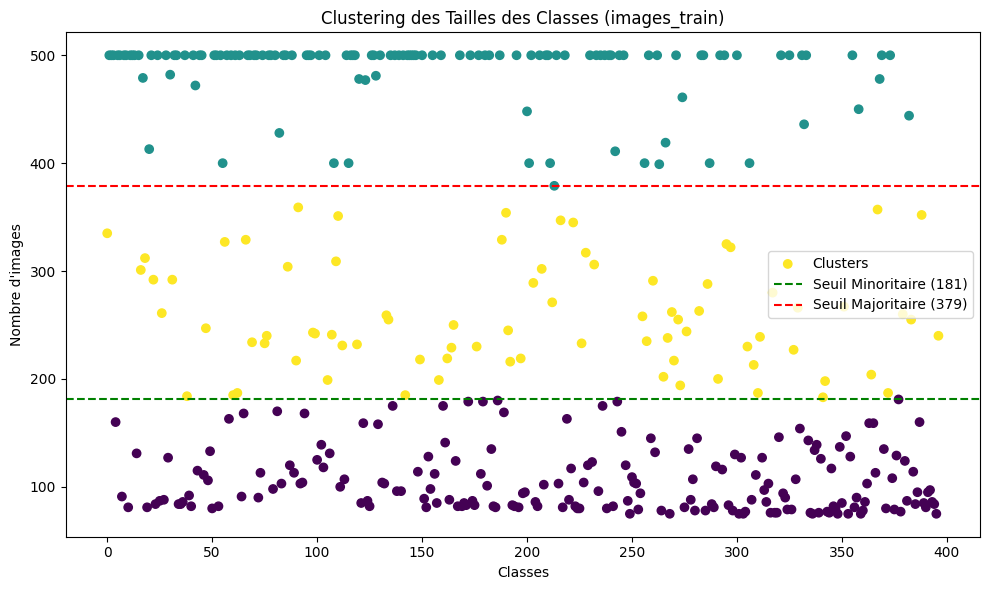


Résumé des Seuils :
- Seuil Minoritaire : < 181
- Seuil Majoritaire : > 379

Testing Set:


c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


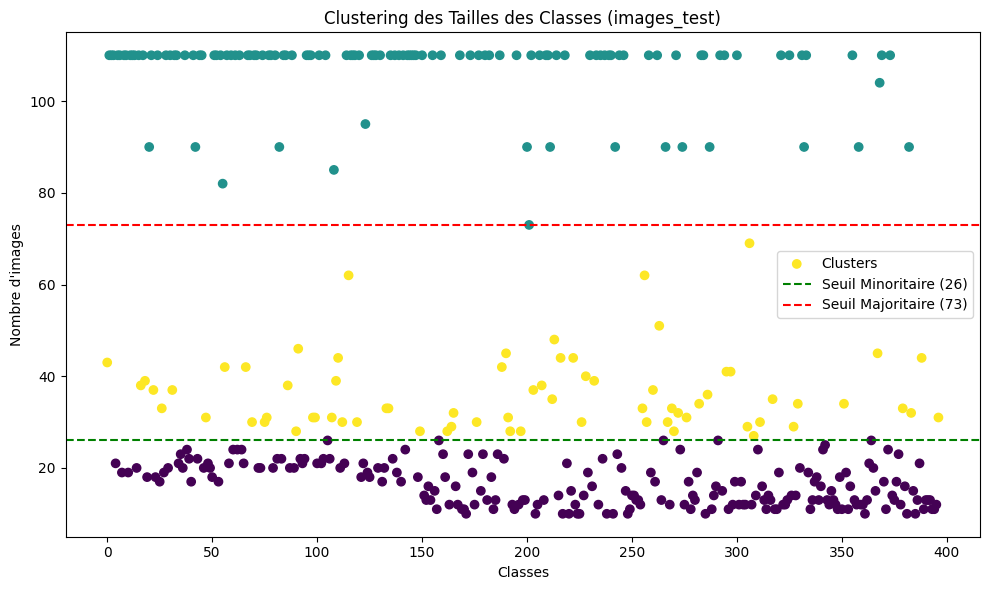


Résumé des Seuils :
- Seuil Minoritaire : < 26
- Seuil Majoritaire : > 73

Validation Set:


c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


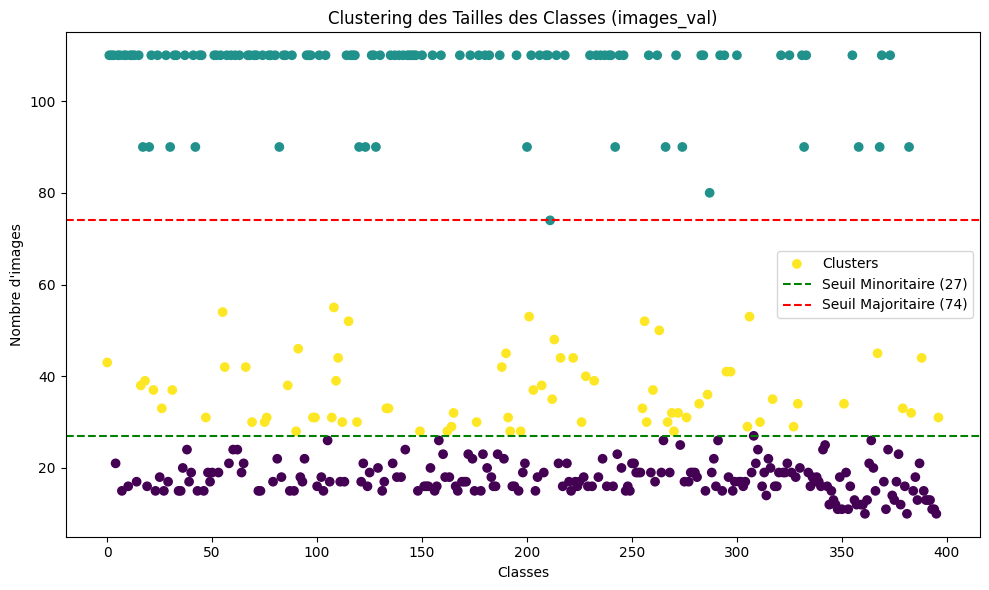


Résumé des Seuils :
- Seuil Minoritaire : < 27
- Seuil Majoritaire : > 74


In [1]:
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def cluster_class_sizes(directory, n_clusters=3):
    """
    Utilise le clustering pour regrouper les tailles des classes et prédire des seuils pour minoritaires/majoritaires.

    :param directory: Chemin du dossier principal (e.g., training, testing, validation).
    :param n_clusters: Nombre de clusters à utiliser pour K-Means.
    :return: Seuils déduits pour les classes minoritaires et majoritaires.
    """
    class_image_counts = []
    class_names = []

    # Compter le nombre d'images par classe
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_image_counts.append(num_images)
            class_names.append(class_folder)

    class_image_counts = np.array(class_image_counts).reshape(-1, 1)

    # Appliquer K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(class_image_counts)
    labels = kmeans.labels_

    # Regrouper les classes par cluster
    clusters = {i: [] for i in range(n_clusters)}
    for idx, label in enumerate(labels):
        clusters[label].append(class_image_counts[idx][0])

    # Trouver les seuils bas et haut
    cluster_sizes = {i: (min(clusters[i]), max(clusters[i])) for i in range(n_clusters)}
    sorted_clusters = sorted(cluster_sizes.items(), key=lambda x: x[1][0])

    minor_threshold = sorted_clusters[0][1][1]  # Max du plus petit cluster
    major_threshold = sorted_clusters[-1][1][0]  # Min du plus grand cluster

    # Visualisation
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(class_image_counts)), class_image_counts, c=labels, cmap='viridis', label="Clusters")
    plt.axhline(y=minor_threshold, color='green', linestyle='--', label=f"Seuil Minoritaire ({minor_threshold})")
    plt.axhline(y=major_threshold, color='red', linestyle='--', label=f"Seuil Majoritaire ({major_threshold})")
    plt.title(f"Clustering des Tailles des Classes ({os.path.basename(directory)})")
    plt.xlabel("Classes")
    plt.ylabel("Nombre d'images")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nRésumé des Seuils :")
    print(f"- Seuil Minoritaire : < {minor_threshold}")
    print(f"- Seuil Majoritaire : > {major_threshold}")

    return minor_threshold, major_threshold


# Chemins des dossiers
train_dir = "archive1\plantnet_300K\images_train"
test_dir = "archive1\plantnet_300K\images_test"
val_dir = "archive1\plantnet_300K\images_val"

# Analyse et clustering pour chaque ensemble
print("Training Set:")
train_min, train_max = cluster_class_sizes(train_dir)

print("\nTesting Set:")
test_min, test_max = cluster_class_sizes(test_dir)

print("\nValidation Set:")
val_min, val_max = cluster_class_sizes(val_dir)
